In [2]:
from mdcrow import MDCrow
import os

In [3]:
descriptive_prompt_4 = "Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Tell me how many residues are in the chains and beta sheets. 3. Simulate for 1 ps at 300 K. 4. Compute the RMSD."
non_descriptive_prompt_4 = "Simulate 1LYZ for 1 ps at 300 K. Tell me how many residues are in the chains and beta sheets and compute the RMSD of the simulation."

In [4]:
llm_model = "claude-3-5-sonnet-20241022"
tools = "all"

In [5]:
#todays date and time
import datetime
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date: 2025-01-16
time: 12:15:54


# descriptive prompt

In [6]:
agent_1 = MDCrow(agent_type="Structured", model=llm_model, top_k_tools=tools)

In [7]:
agent_1.run(descriptive_prompt_4)

Thought: I'll help solve this step by step. Let's start by downloading the PDB file 1LYZ.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that we have downloaded the PDB file, let's get information about the residues and beta sheets using GetTurnsBetaSheetsHelices. First, we need to get the UniProt ID and primary accession number.

Action:
```
{
    "action": "GetUniprotID",
    "action_input": "1LYZ"
}
```

Thought: I'll continue with getting the primary accession number and structural information, then proceed with the simulation and RMSD calculation.

Action:
```
{
    "action": "GetTurnsBetaSheetsHelices",
    "action_input": {
        "query": "1LYZ",
        "primary_accession": "P17897"
    }
}
```

Thought: Let me continue with setting up and running the simulation, since we have the PDB file. We'll use the SetUpandRunFunction with appropriate parameters for a 1 ps simulation at 300 K.

Action:
`

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [8]:
registry = agent_1.path_registry
print("ckpt_dir:",os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_dir: ckpt_105
Files found in registry: 1LYZ_121557: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_121557
 1LYZ_121615: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_121620: Initial positions for simulation sim0_121620
 sim0_121620: Basic Simulation of Protein 1LYZ_121615
 rec0_121624: Simulation trajectory for protein 1LYZ_121615 and simulation sim0_121620
 rec1_121624: Simulation state log for protein 1LYZ_121615 and simulation sim0_121620
 rec2_121624: Simulation pdb frames for protein 1LYZ_121615 and simulation sim0_121620
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_122012: RMSD plot for 1LYZ


In [9]:
import re
import os
match = re.search(r"rec0_\d+", paths_and_descriptions)
traj_id = match.group(0)
traj_path = registry.get_mapped_path(traj_id)
match = re.search(r"top_sim0_\d+", paths_and_descriptions)
top_id = match.group(0)
top_path = registry.get_mapped_path(top_id)
assert os.path.exists(traj_path), "Trajectory file doesn't exist"
assert os.path.exists(top_path), "Topology file doesn't exist"
assert traj_path.endswith(".dcd")
assert top_path.endswith(".pdb")
print(f"It's asserted that file paths for {traj_id} and {top_id} exist")

It's asserted that file paths for rec0_121624 and top_sim0_121620 exist


In [18]:
# # this checks DSSP for the first frame, change to the last frame if needed
# import mdtraj as md

# traj_path = registry.get_mapped_path(traj_id)
# top_path = registry.get_mapped_path(top_id)
# traj = md.load(traj_path, top=top_path)[0] # first frame

# secondary_structure = md.compute_dssp(traj,simplified=True)[0]
# print("Number of chains: ",traj.n_chains)
# print("Number of residues in sheets: ",len([i for i in secondary_structure if i == 'E']))
# print("Number of residues in helices: ",len([i for i in secondary_structure if i == 'H']))
# print("Number of residues in coils: ",len([i for i in secondary_structure if i == 'C']))

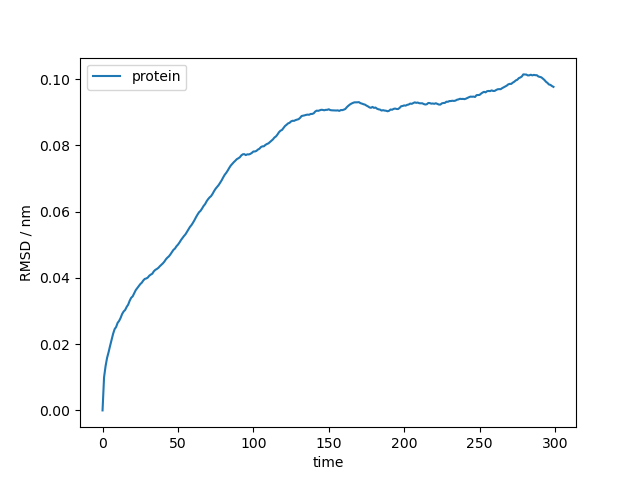

In [11]:
from IPython.display import Image
match = re.search(r"fig0_\d+", paths_and_descriptions)
fig_id = match.group(0)
fig_path = registry.get_mapped_path(fig_id)
assert os.path.exists(fig_path), "This figure does not exist."
Image(filename=fig_path)

# non-descriptive prompt

In [12]:
agent_2 = MDCrow(agent_type="Structured", model=llm_model, top_k_tools=tools)

In [13]:
agent_2.run(non_descriptive_prompt_4)

Thought: I'll break this down into steps. First, I need to download the PDB file for 1LYZ, then run a simulation, and finally analyze the results. Let's start by downloading the PDB file.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that I have the PDB file, I'll set up and run a simulation. I'll use the SetUpandRunFunction with appropriate parameters for a 1 ps simulation at 300 K.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_122022",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "save": true,
        "system_params": {
            "nonbondedMethod": "PME",
            "nonbondedCutoff": "1.0 * nanometers",
            "constraints": "HBonds",
            "rigidWater": true,
            "ewaldErrorTolerance": 0.0005,
            "constraintTolerance": 0.000001,
            "solvate": true
        },
        "integr

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [14]:
registry = agent_2.path_registry
print("ckpt_dir:",os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_dir: ckpt_106
Files found in registry: 1LYZ_122022: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_122022
 1LYZ_122032: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_122037: Initial positions for simulation sim0_122037
 sim0_122037: Basic Simulation of Protein 1LYZ_122032
 rec0_122041: Simulation trajectory for protein 1LYZ_122032 and simulation sim0_122037
 rec1_122041: Simulation state log for protein 1LYZ_122032 and simulation sim0_122037
 rec2_122041: Simulation pdb frames for protein 1LYZ_122032 and simulation sim0_122037
 rec0_122441: dssp values for trajectory with id: rec0_122041
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_122445: RMSD plot for 1LYZ


In [ ]:
import re
import os
match = re.search(r"rec0_\d+", paths_and_descriptions)
traj_id = match.group(0)
traj_path = registry.get_mapped_path(traj_id)
match = re.search(r"top_sim0_\d+", paths_and_descriptions)
top_id = match.group(0)
top_path = registry.get_mapped_path(top_id)
assert os.path.exists(traj_path), "Trajectory file doesn't exist"
assert os.path.exists(top_path), "Topology file doesn't exist"
assert traj_path.endswith(".dcd")
assert top_path.endswith(".pdb")
print(f"It's asserted that file paths for {traj_id} and {top_id} exist")

It's asserted that file paths for rec0_122041 and top_sim0_122037 exist


In [ ]:
# this checks DSSP for the first frame, change to the last frame if needed
import mdtraj as md

traj_path = registry.get_mapped_path(traj_id)
top_path = registry.get_mapped_path(top_id)
traj = md.load(traj_path, top=top_path)[0] # first frame

secondary_structure = md.compute_dssp(traj,simplified=True)[0]
print("Number of total residues: ",traj.n_residues)
print("Number of chains: ",traj.n_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure if i == 'C']))

Number of total residues:  6921
Number of chains:  3
Number of residues in sheets:  14
Number of residues in helices:  50
Number of residues in coils:  65


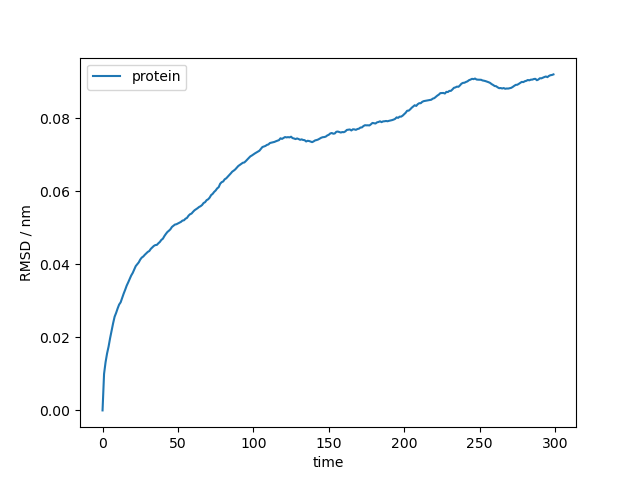

In [ ]:
from IPython.display import Image
match = re.search(r"fig0_\d+", paths_and_descriptions)
fig_id = match.group(0)
fig_path = registry.get_mapped_path(fig_id)
assert os.path.exists(fig_path), "This figure does not exist."
Image(filename=fig_path)